🗣 Vinicios Alves Ferreira  

[1 Project Description](#1-Project-Description)      
[1.1 The Goal](#1.1-The-Goal)  
[1.2 Metric](#1.2-Metric)  
[1.3 Dataset](#1.3-Dataset)  
[2 Getting Started](#2-Getting-Started)  
[3 Exploratory Data Analysis (EDA)](#3-Exploratory-Data-Analysis-(EDA))   
[4 Pre Proccessing](#4-Pre-Processing)   
[4.1 Data Cleaning](#4.1-Data-Cleaning)   
[4.2 Feature Engineering](#4.2-Feature-Engineering)   
[4.3 Feature Selection](#4.3-Feature-Selection)   
[4.4 Train Test Split](#4.4-Train-Test-Split)   
[5 Logistic Regression](#5-Logistic-Regression)   
[5.1 Definition](#5.1-Definition)   
[5.2 Theory](#5.2-Theory)   
[5.3 Model Train Phase](#5.3-Model-Train-Phase)   
[5.4 Model Test Phase](#5.4-Model-Test-Phase)   
[6 Conclusion](#6-Conclusion)      

------
<center><img src="https://upload.wikimedia.org/wikipedia/commons/e/e1/Titanic_under_construction.jpg" width="600px"></center>

------   

# 1 Project Description
This project analyzes the factors that contributed to the high number of fatalities in the Titanic tragedy of 1912. Throughout the analysis, we will explore the dataset to understand its structure and the information provided by its features. We will formulate hypotheses, test them using Data Mining and Exploratory Data Analysis (EDA), and identify the most influential factors in passenger survival. Finally, we will apply Machine Learning models using an ML pipeline to evaluate whether our analysis is sufficient to achieve good accuracy in survival prediction.

## 1.1 The Goal
Our job is to predict if a passenger survived the sinking of the Titanic or not. With this description is clear that the most indicated ML algorithms to work are the “Classification Algorithms”, that include Logistic Regression, Decision Tree, Random Forest, SVM (Support Vector Machine, KNN (K-Nearest Neighbors), etc. 

## 1.2 Metric
Our score is the percentage of passengers correctly predicted. This is known as accuracy, and because we are going to work with classification algorithms, the most indicate performance metrics are accuracy, precision, recall, F1 Score and AUC-ROC.

## 1.3 Dataset
This dataset contains two CSV files. The first one, train.csv, contains the data used to train the chosen Machine Learning algorithm. The Survived feature serves as the target variable, guiding the model to recognize patterns that determine whether a passenger survived or not.
   
The second file, test.csv, differs from the first because it does not include the Survived feature. The goal is to evaluate whether our trained algorithm can correctly identify survival patterns and make accurate predictions.
   
Below is a description of each feature in the dataset taken from the [Titanic - Machine Learning from Disaster (Dataset Description)](https://www.kaggle.com/c/titanic/data):


| Variable  | Defnition | Key |
| ------------- | ------------- | ------------- |
| PassengerID  | Passenger id |   |
| Survived  | Survival | 0 = No, 1 = Yes |
| Pclass  | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| Name  | Passenger name |   |
| Sex  | Sex |   |
| Age  | Age in years |   |
| SibSp  | # of siblings / spouses aboard the Titanic |   |
| Parch | # of parents / children aboard the Titanic |   |
| Ticket  | Ticket number |   |
| Fare  | Passenger fare |   |
| Cabin  | Cabin number |   |
| Embarked  | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
> **pclass**: A proxy for socio-economic status (SES)   
1st = Upper   
2nd = Middle   
3rd = Lower   
**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5   
**sibsp**: The dataset defines family relations in this way...   
Sibling = brother, sister, stepbrother, stepsister   
Spouse = husband, wife (mistresses and fiancés were ignored)   
**parch**: The dataset defines family relations in this way...   
Parent = mother, father   
Child = daughter, son, stepdaughter, stepson   
Some children travelled only with a nanny, therefore parch=0 for them.   


# 2 Getting Started
First, we need to import both our dataset and the necessary Python libraries. Additionally, we will explore the dataset’s structure using fundamental Pandas methods to understand its characteristics. This initial exploration will help us identify missing values, data types, and potential preprocessing steps, guiding the next phases of our analysis.

In [1]:
# Importing the Libriries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Importing the train.csv dataset

train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-----
With these information, there is some important points to comment.  
1) For the nature of the float features we have, its possible to fill the NaN values with the mean of all the data;     
2) The 'Cabin' feature has so many NaN values that dropping it is a possible action;     
3) Emabarked NaN values can be replaced with the most incident value of the feature;      
4) Some features has no importance alone, but they have some information that can be utilized if combined with others;      
> **E.g. SibSP and Parch indicate that the individual is part of a Family**      

5) There is also features that have valuable information inside them, like 'Name', where we can obtain the Civil State of the individuals.      

# 3 Exploratory Data Analysis (EDA)

>Due to compatibility issues when opening this notebook on Kaggle, the Exploratory Data Analysis (EDA) is not included here. However, you can find the full analysis on my GitHub:
>
> **Repository Link: https://github.com/viniferreira-dev/Titanic.git**

# 4 Pre Processing
After the analysis, it is time to prepare the data for training our Machine Learning model. Proper preprocessing is crucial to ensure that the model receives clean, well-structured data, improving its performance and generalization.

## 4.1 Data Cleaning
The first step to process our data is cleaning all the features. This step involves handling missing values, correcting data entry mistakes, and identifying and removing outliers. Additionally, we standardize the format of categorical variables and address any discrepancies between different data sources.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print(train['Age'].isnull().value_counts())
print("-"*40)
print(f"The age mean is: {train['Age'].mean().round(2)}")
print("-"*40)
print(train['Embarked'].isnull().value_counts())
print("-"*40)
print(f"The local of embarkation with more occurrences is: {train['Embarked'].mode()[0]}")
print("-"*40)

Age
False    714
True     177
Name: count, dtype: int64
----------------------------------------
The age mean is: 29.7
----------------------------------------
Embarked
False    889
True       2
Name: count, dtype: int64
----------------------------------------
The local of embarkation with more occurrences is: S
----------------------------------------


In [5]:
# As in the most cases the age value is around its average, we are going to fill the NaN with this value
train['Age'] = train['Age'].fillna(train['Age'].mean())

# As in the most cases Embarked == "S", we are going to fill the NaN with this value
train['Embarked']= train['Embarked'].fillna("S")

# By default the 'Fare' must also be filled in with its average
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4.2 Feature Engineering
Next, to achieve better performance in our predictions, we need to analyze our data and create new features that may reveal different correlations between the passengers' characteristics and the target feature, "Survived." Additionally, it is necessary to transform some of our categorical features into numerical ones using the One-Hot-Encoding method. This process will allow the model to interpret categorical variables effectively, as machine learning algorithms typically perform better with numerical inputs. By engineering new features and encoding categorical variables, we can provide the model with more relevant and usable information, improving its ability to make accurate predictions.

In [7]:
# Appllying  One-Hot-Encoding
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=False)

# Creating the feature 'FamilySize' as a sum of 'SibSp' and 'Parch'
train['FamilySize'] = train['SibSp'] + train['Parch']

# Creating the binary feature 'HasFamily' with the 'FamilySize' as a condition
train['HasFamily'] = (train['FamilySize'] > 0).astype(int)

## 4.3 Feature Selection
To ensure that our model only utilizes the necessary data to discover the best patterns, we need to select the most important features from our dataset. To improve the accuracy of our model, we will analyze the correlation between the features and the target feature using a correlation matrix.

The correlation matrix helps us identify which features are strongly related to the target variable, as well as which features are highly correlated with each other. By understanding these relationships, we can eliminate redundant features and focus on the most informative ones, leading to better model performance and reduced complexity.

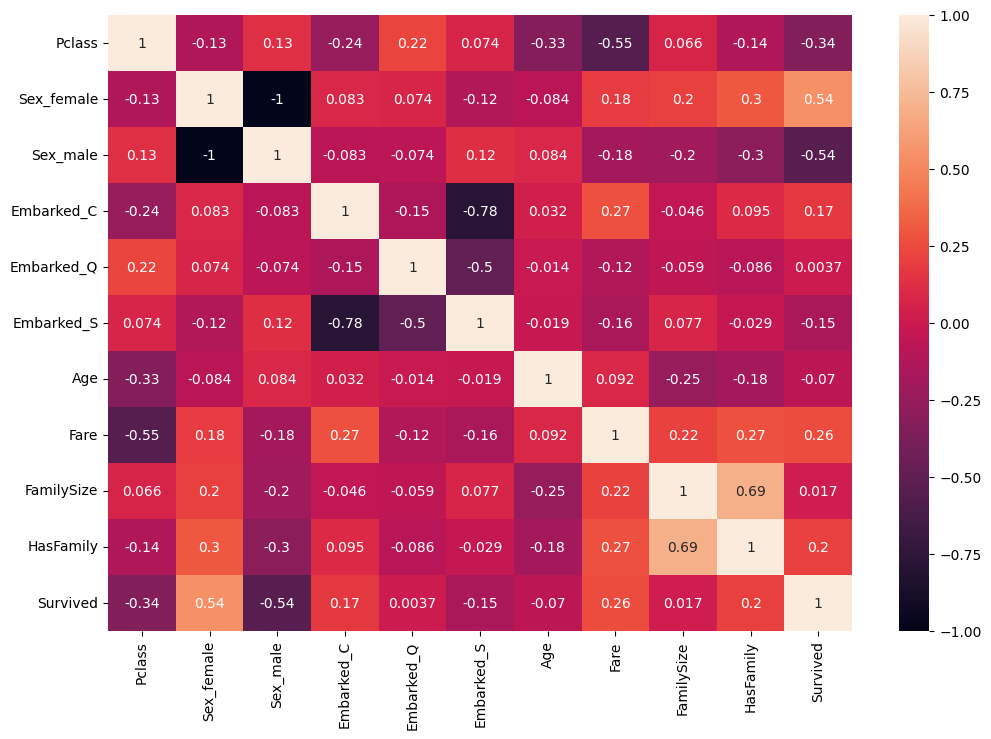

In [8]:
# Chosing what features should be utilized in the ML Model
teste = ['Pclass',
         'Sex_female',
         'Sex_male', 
         'Embarked_C',
         'Embarked_Q',
         'Embarked_S',
         'Age', 
         'Fare', 
         'FamilySize', 
         'HasFamily', 
         'Survived']

# Calculating and ploting the correlation matrix
corr_matrix = train[teste].corr(numeric_only=True)
plt.figure(figsize=(12, 8))
dataplot = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [9]:
# Selecting the ML Model features
features = [ 'Pclass','Sex_female','Embarked_S','Embarked_C', 'Fare','Age','FamilySize','HasFamily']
X = train[features]  # Features
y = train['Survived']  # Target

## 4.4 Train-Test-Split
Now we are going to split the data in 'train.csv' into two sections: Train and Valid.

This is a common process used to evaluate how well the model is learning to answer your questions. The data will be split into 80% for training and 20% for validation.

- **X_train:** Contains the features (input data) used to train the model.
- **X_valid:** Contains the features used to validate the model's performance on unseen data.
- **y_train:** Contains the target variable (e.g., "Survived") for the training set, used for model learning.
- **y_valid:** Contains the target variable (e.g., "Survived") for the validation set, used to evaluate the model's performance.  

This split ensures that the model is not overfitting to the training data and can generalize well to new, unseen data.

> If you want to learn more about overfitting and underfitting, check out: [ML | Underfitting and Overfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 5 Logistic Regression 

After analyzing our data, cleaning it, creating new features, applying one-hot encoding, and defining a train-test split, it is now time to apply a Machine Learning model that fits our main problem: determining whether a passenger survived (1) or did not survive (0).

There are many models capable of handling this task, but classification models are generally more suitable for straightforward problems like this. Since we are working with binary classification (0 and 1), the chosen model is Logistic Regression, which is well-suited for this type of problem due to its ability to output probabilities and make clear distinctions between classes.

> If you want to learn more about Linear Regression, access this N: [ML | Underfitting and Overfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)



## 5.1 Definition

The Logistic Regression model is a machine learning algorithm that, given the input data from each feature, initial weights, and bias, computes predictions and compares them with the actual values in the target variable. By measuring the difference between predicted and actual values, the model updates the weights and bias iteratively, repeating this process until convergence.

All outputs are probabilities, meaning they range between 0 and 1. To make final predictions, we apply a threshold function, converting probabilities into binary outputs (0 or 1).


## 5.2 Theory

The central idea of Logistic Regression is to transform a linear combination of input features into a probability. This linear combination is called the net input function, denoted as $z$ and it consists of the feature values $x_n$, their corresponding weights $w_n$ and a bias term $b$. We represent it in its expanded form as: $$z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$$

To obtain the probability from the net input function, we use an activation function called the Sigmoid Function. This function, denoted as $\sigma(z)$, transforms the value of $z$ into a probability, indicating how likely a given instance belongs to a specific positive class (typically labeled as 1) based on the current feature values. The mathematical definition of the sigmoid function is: $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
>Its outputs are restricted to a range between 0 and 1, which gives the function its probabilistic behavior. The estimated likelihood of belonging to the positive class (1) increases as the output gets closer to 1, while a value closer to 0 indicates a lower likelihood. Additionally, its S-shaped curve helps in visually analyzing the behavior of the function.

With the probability obtained, the next step is to analyze how far this value is from the actual output of the target variable. To do this, we use a loss function called Binary Cross-Entropy (BCE), denoted mathematically as $\mathcal{L}(y^{(i)}, \hat{y}^{(i)})$.

Binary Cross-Entropy measures the difference between two probabilities, which in our case are $\hat{y}$ (the sigmoid output) and $y$ (target feature). Its formula is given by: $$\mathcal{L}(y^{(i)}, \hat{y}^{(i)}) = - \left( y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right)$$
> If you want to learn more about how Binary Cross-Entropy works, check out: [Understanding binary cross-entropy / log loss: a visual explanation](https://medium.com/towards-data-science/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

After computing the Binary Cross-Entropy (BCE), we can now determine the value of the Cost Function. This function quantifies how well the model is performing in relation to the target variable. The goal of our model is to minimize the cost function, which is achieved by adjusting the parameters $w$ (weights) and $b$ (bias).

The cost function $J(w, b)$ is defined as the average loss across all training examples and is given by:  $$J(w, b) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}(y^{(i)}, \hat{y}^{(i)})$$

where:

- $m$ is the total number of training examples.  

- $\mathcal{L}(y^{(i)}, \hat{y}^{(i)})$ represents the loss for a single example, computed using Binary Cross-Entropy.   

By minimizing $J(w, b)$, the model learns to make better predictions over time. This optimization is typically performed using Gradient Descent ($\nabla J$), which iteratively updates the parameters to reduce the cost function to its minimum value. Additionally, a hyperparameter $α$, defined by the user, controls the learning rate. The values $w$ and $b$ are updated according to the following formulas:
$$
w_j := w_j - \alpha \frac{\partial J}{\partial w_j}
$$
$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

    

<center><img src="https://i.imgur.com/yhftAn0.png" width="500px"></center>    

 
Finally, after all iterations, the predicted values $\hat{y}^{(i)}$ are classified into binary outcomes using a threshold rule, typically set at 0.5, as follows:
$$
h(x) = 
\begin{cases} 
1 & \text{if } P(y=1|x) \geq 0.5 \\
0 & \text{if } P(y=1|x) < 0.5 
\end{cases}
$$
Once the parameters are adjusted and the model is trained, it can be applied to other datasets to evaluate its performance on real-world cases.


<center><img src="https://i.imgur.com/dGnvQyT.png" width="600px"></center>  

## 5.3 Model Train Phase
Now that we have a solid understanding of how Logistic Regression works, it's time to apply this algorithm to our training dataset using the Scikit-learn library. This phase is crucial as it involves training the model on the dataset to learn the underlying patterns and relationships between the features and the target variable.

In [11]:
from sklearn.linear_model import LogisticRegression

# Inicializating and training the model

model = LogisticRegression(max_iter=900)
model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [12]:
from sklearn.metrics import accuracy_score

# Making predictions
y_pred = model.predict(X_valid)

# Calculating the accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 80.45%


In [13]:
# Utilizing all the data in train.csv

model_final = LogisticRegression(max_iter=900)
model_final.fit(X, y)  

LogisticRegression(max_iter=900)

## 5.4 Model Test Phase
Once the model has been trained, the next step is to evaluate its performance on the test dataset. This phase is critical to understanding how well the model generalizes to unseen data. Since the test dataset does not include the target variable during real-world application, we simulate this scenario by applying the same preprocessing steps used on the training data and then making predictions.


In [14]:
# Pre Processing
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna("S")
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=False)
test['FamilySize'] = test['SibSp'] + test['Parch']
test['HasFamily'] = (test['FamilySize'] > 0).astype(int)

# Excluding collumns that will not be utilized
test = test.drop(columns=[ "Name","Ticket", "Cabin", "PassengerId", "Parch", "SibSp","Sex_male","Embarked_Q"])

In [15]:
y_pred_test = model.predict(test[features])

In [16]:
# Creating the archive for the Titanic dataset competition

submission = pd.DataFrame({'PassengerId': pd.read_csv("/kaggle/input/titanic/test.csv")['PassengerId'],
                           'Survived': y_pred_test})
submission.to_csv("submission.csv", index=False)

# 6 Conclusion

After completing our analysis and predictions, we can conclude that the preprocessing steps and the Logistic Regression model were effective in constructing a reliable process for predicting the survival status of any passenger, even without a target variable. Throughout this work, some initial hypotheses were disproven, such as the assumption that older individuals were more susceptible to not surviving. However, we found a strong correlation between gender and survival probability, with female passengers having a significantly higher survival rate than male passengers.

Additional features also played a crucial role in predicting the "Survival" variable, including those indicating family connections on board and, notably, the "Pclass" feature, which likely reflected the passenger's location during the incident.

Our model achieved an accuracy of 77%, which is quite promising given the minimal hyperparameter tuning and the use of a relatively simple machine learning model. More sophisticated models, such as Random Forest, Gradient Boosting, or Neural Networks, could potentially enhance predictive performance further. Nonetheless, Logistic Regression provided valuable insights and a solid baseline for this classification problem.

-----
### Thank you for taking the time to read this analysis! I hope you found it helpful. If you have any questions or spot any mistakes, feel free to send me a message!
### 📌 LinkedIn: [Vinicios Alves Ferreira](https://www.linkedin.com/in/viniciosalves/)   